In [1]:
# Checkout www.pygimli.org for more examples
%matplotlib inline


Fitting SIP signatures
----------------------

This example highlights some of the capabilities of pyGimli to analyze spectral
induced polarization (SIP) signatures.

**Author:** *Maximilian Weigand, University of Bonn* 
(Modified(DRY) carsten-forty2


Import pyGIMLi and related stuff for SIP Spectra



In [3]:
from pygimli.physics.SIP import SIPSpectrum, modelColeColeRho
import numpy as np
import pygimli as pg

import pandas as pd
import matplotlib.pyplot as plt

import csv
import string

1. Generate synthetic data with a Double-Cole-Cole Model and initialize an 
SIPSpectrum object
TODO merge with 3



f = np.logspace(-2, 5, 100)
Z1 = modelColeColeRho(f, rho=1, m=0.1, tau=0.5, c=0.5)
Z2 = modelColeColeRho(f, rho=1, m=0.25, tau=1e-6, c=1.0)

rho0 = 100 # (Ohm m)
Z = rho0 * (Z1 + Z2)

sip = SIPSpectrum(f=f, amp=np.abs(Z), phi=-np.angle(Z))
# Note the minus sign for the phases: we need to provide -phase[rad]

sip.showData()
sip.showDataKK()  # check Kramers-Kronig relations

2. Fit a Cole-Cole model from synthetic data




In [4]:
file_path ="C:/Users/whyzz/python_jupyter/Cole-Cole_fitting/digitizing/"  ### input pathfile_path ="" 
# output_path ="C:/Users/whyzz/python_jupyter/Cole-Cole_fitting/digitizing/output/"  ### output pathfile_path ="" 
file_path

'C:/Users/whyzz/python_jupyter/Cole-Cole_fitting/digitizing/'

In [5]:
file_name = "Revil_2016_pt4_fig12_Pyrite.csv"

In [6]:
##### definition/function for SIP fitting graph and SIP fitting result

def sip_show_graph(freq, res_data, phase_data):
#     f = np.array([0.125, 0.25, 0.625, 1, 3, 5, 8, 24, 40, 64, 192, 320])
    res = res_data
    phase = phase_data
    sip = SIPSpectrum(f = freq, amp= res, phi= phase)
#     sip.fitCCEM()
    sip.fitColeCole()
    return sip.showAll()

def sip_show_graph_2(freq, res_data, phase_data, amp_min, amp_max, phase_min, phase_max):
#     f = np.array([0.125, 0.25, 0.625, 1, 3, 5, 8, 24, 40, 64, 192, 320])
    res = res_data
    phase = phase_data
    sip = SIPSpectrum(f = freq, amp= res, phi= phase)
#     sip.fitCCEM()
    sip.fitColeCole()
    return sip.showAll_2(amp_min, amp_max, phase_min, phase_max)

def sip_all_result(freq, res_data, phase_data):
    res = res_data
    phase = phase_data
    sip = SIPSpectrum(f = freq, amp= res, phi= phase)
#     sip.fitCCEM()
    sip.fitColeCole() 
    
    ### result form --> rho, m, tau, c --> in one list array, thus we need to extract each variable
    
    rho = sip.result_edit().split()[1][7:]      ### select the rho value from the _e section
    m = sip.result_edit().split()[2][2:]
    tau = sip.result_edit().split()[3][7:-1]
    c = sip.result_edit().split()[4][2:]
    
    return rho, m, tau, c

''' with saving rho and phase graph'''
def sip_show_graph_save(freq, res_data, phase_data, savename, amp_y_min, amp_y_max, phase_y_min, phase_y_max):
#     f = np.array([0.125, 0.25, 0.625, 1, 3, 5, 8, 24, 40, 64, 192, 320])
    res = res_data
    phase = phase_data
    sip = SIPSpectrum(f = freq, amp= res, phi= phase)
#     sip.fitCCEM()
    sip.fitColeCole()
    
    return sip.showAll(savename, amp_y_min, amp_y_max, phase_y_min, phase_y_max)

In [7]:
col_name = ['f1' , 'a1' , 'p1']
df1 = pd.read_csv(file_path + file_name , names = col_name, header=1, comment='#')
df1

f1          a1       p1
0      0.018047  148.630371 -0.03503
1      0.032389  144.506582 -0.05298
2      0.057148  139.664805 -0.07558
3      0.100856  135.574837 -0.11013
4      0.183950  127.292863 -0.15796
5      0.319007  117.263538 -0.21375
6      0.552841  104.344923 -0.26690
7      1.024000   91.313360 -0.30078
8      1.803433   81.016924 -0.29417
9      3.178337   74.499549 -0.24970
10     5.579561   70.846115 -0.18930
11    10.055415   68.854875 -0.13421
12    17.750067   67.589032 -0.09173
13    31.746803   66.679558 -0.06187
14    55.411512   66.009215 -0.04197
15   100.646807   65.596568 -0.02872
16   178.032791   65.270743 -0.02011
17   310.742031   65.108829 -0.01482
18   557.185749   65.027962 -0.01152
19   998.619403   64.867249 -0.00955
20  1766.851298   64.707329 -0.00891
21  3125.359644   64.627873 -0.00827
22  5602.733948   64.548195 -0.01028
23  9912.883449   64.548195 -0.01428

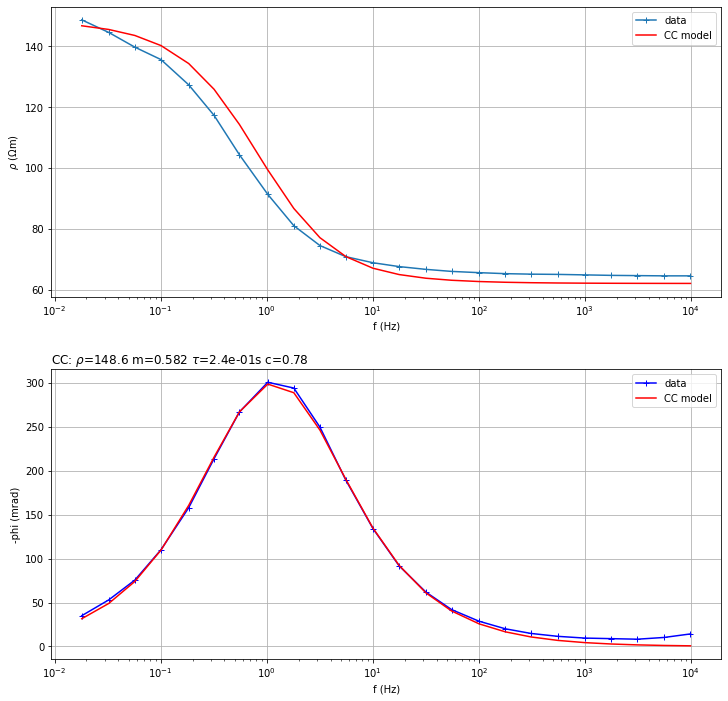

(<Figure size 864x864 with 2 Axes>,
 array([<AxesSubplot:xlabel='f (Hz)', ylabel='$\\rho$ ($\\Omega$m)'>,
        <AxesSubplot:title={'left':'CC: $\\rho$=148.6 m=0.582 $\\tau$=2.4e-01s c=0.78'}, xlabel='f (Hz)', ylabel='-phi (mrad)'>],
       dtype=object))

In [8]:
sip_show_graph(freq= df1.f1, res_data= df1.a1, phase_data= -df1.p1)

Z = modelColeColeRho(f, rho=100, m=0.1, tau=0.01, c=0.5)
# TODO data need some noise

sip = SIPSpectrum(f=f, amp=np.abs(Z), phi=-np.angle(Z))
sip.fitColeCole(useCond=False, verbose=False)  # works for both rho and sigma models
sip.showAll()

3. Fit a double Cole-Cole model




f = np.logspace(-2, 5, 100)
Z1 = modelColeColeRho(f, rho=1, m=0.1, tau=0.5, c=0.5)
Z2 = modelColeColeRho(f, rho=1, m=0.25, tau=1e-6, c=1.0)

rho0 = 100 #(Ohm m)
Z = rho0 * (Z1 + Z2)

# TODO data need some noise
sip = SIPSpectrum(f=f, amp=np.abs(Z), phi=-np.angle(Z))
sip.fitCCEM(verbose=False) # fit an SIP Cole-Cole term and an EM term (also Cole-Cole)
sip.showAll()

In [9]:
import inspect

In [10]:
print(inspect.getsource(SIPSpectrum.fitColeCole))

    def fitColeCole(self, useCond=False, **kwargs):
        """Fit a Cole-Cole model to the phase data

        Parameters
        ----------
        useCond : bool
            use conductivity form of Cole-Cole model instead of resistivity
        error : float [0.01]
            absolute phase error
        lam : float [1000]
            initial regularization parameter
        mpar : tuple/list (0, 0, 1)
            inversion parameters for chargeability: start, lower, upper bound
        taupar : tuple/list (1e-2, 1e-5, 100)
            inversion parameters for time constant: start, lower, upper bound
        cpar : tuple/list (0.25, 0, 1)
            inversion parameters for Cole exponent: start, lower, upper bound
        """
        if useCond:  # use conductivity formulation instead of resistivity
            self.mCC, self.ampCC, self.phiCC = fitCCCC(self.f, self.amp,
                                                       self.phi, **kwargs)
            self.mCC[0] = 1. / self

In [11]:
print(inspect.getsource(pg.tools.fitCCC))

AttributeError: module 'pygimli' has no attribute 'tools'

In [12]:
help(tools.fitCCC)

NameError: name 'tools' is not defined

3. Fit a Cole-Cole model to 



f = np.logspace(-2, 5, 100)
Z = modelColeColeRho(f, rho=100, m=0.1, tau=0.01, c=0.5)
sip = SIPSpectrum(f=f, amp=np.abs(Z), phi=-np.angle(Z))

sip.showAll()
sip.fitDebyeModel(new=True, showFit=True)
pg.wait()

<div class="alert alert-info"><h4>Note</h4><p>This tutorial was kindly contributed by Maximilian Weigand (University of
  Bonn). If you also want to contribute an interesting example, check out
  our contribution guidelines https://www.pygimli.org/contrib.html.</p></div>

